In [27]:
#concateating a List of mumbers
A = [1,2,3,4,5,6] 
B = [13, 21, 34]

for i in B : 
    A.append(i) 
    
#print concatinated list    
print(str(A))

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [67]:
#import plotting library
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fuel_data = pd.read_csv('fuel_ferc.csv')

# checking the first few rows and the columns 
fuel_data.head()

# checking the last rows 
fuel_data.tail()

#shape of the dataset
fuel_data.shape

#running the dataset with .describe to show the count, mean,std etc
fuel_data.describe()

#checking for all the column headers 
fuel_data.columns

fuel_data.nunique()



#analysing the standard deviation of the dataset
fuel_data.std()



Unnamed: 0                      8.522700e+03
utility_id_ferc1                7.417835e+01
report_year                     7.025483e+00
fuel_qty_burned                 9.118004e+06
fuel_mmbtu_per_unit             1.060022e+01
fuel_cost_per_unit_burned       2.854490e+03
fuel_cost_per_unit_delivered    6.877593e+04
fuel_cost_per_mmbtu             2.091541e+03
dtype: float64

In [70]:
# A subset dataset of only coal fuel type 
coal_fueldata = fuel_data.loc[fuel_data['fuel_type_code_pudl']=='coal']
#coal data above their years
group_coal = coal_fueldata.groupby('report_year').sum()

#analysing the specified years of the data and saving in two variables
year_1, year_2 = group_coal.loc[[1994,1998], 'fuel_cost_per_unit_burned']

#percentage change equation
percentage_change = ((year_1 - year_2)/year_1)*100
print(percentage_change)


20.56765451826049


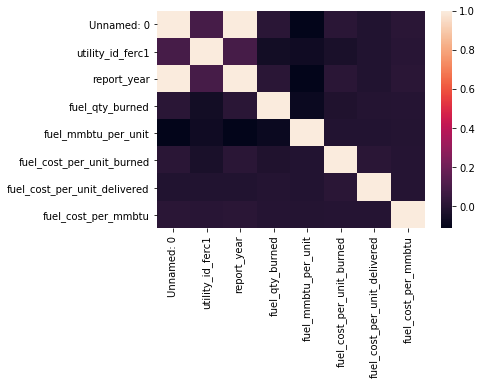

In [73]:
sns.heatmap(fuel_data.corr())

In [75]:
#checking for missing values
fuel_data.isnull().sum()

Unnamed: 0                        0
record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [77]:
fuel_data.corr().loc['fuel_cost_per_unit_burned'].sort_values()

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
Unnamed: 0                      0.013806
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

In [78]:
fuel_data.groupby('report_year')['report_year'].count()
fuel_data.groupby('fuel_type_code_pudl').first()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,,
coal,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,14,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,84,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,49,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [79]:
#correlation using sprearman
fuel_data.corr('spearman').loc['fuel_cost_per_unit_burned'].sort_values()

fuel_qty_burned                -0.390275
utility_id_ferc1               -0.074844
Unnamed: 0                      0.230923
report_year                     0.233647
fuel_cost_per_mmbtu             0.318533
fuel_mmbtu_per_unit             0.557998
fuel_cost_per_unit_delivered    0.760263
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64